# Problem set 1:

## Question 1

In [1]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import pandas as pd


%matplotlib inline
#define cluster and calc the mean

clustera = [1.060,1.020,0.873,0.781,0.929,0.862,1.070,0.962]
mean = np.mean(clustera)
print "The mean of our sample is: %0.3f" %mean

The mean of our sample is: 0.945


## Question 2

In [2]:
#variance and standard deviation
variance = np.var(clustera,ddof=1)
deviation = np.std(clustera,ddof=1)

print "The variance of our sample is : %0.3f" %variance
print "the standard deviation of our sample is : %0.3f" %deviation

The variance of our sample is : 0.011
the standard deviation of our sample is : 0.103


## Question 3

In [3]:
standard_error = ss.sem(clustera)

print "Our cluster has a mean of: %0.3f ± %0.3f" % (mean,standard_error)


Our cluster has a mean of: 0.945 ± 0.036


## Question 4

we start with the following equation:
\begin{equation}
SE = \sqrt{\frac{s_x^2}{n}}
\end{equation}
which we can reduce to the standard deviation over sqrt of n:
\begin{equation}
SE = \frac{s_x}{\sqrt{n}}
\end{equation}
after rearranging and squaring we get:
\begin{equation}
n = (\frac{s_x}{SE})^2
\end{equation}
filling it in, in the notebook below we get:

In [4]:
n = (deviation/0.01)**2
print "number of stars = %.1f" %n

number of stars = 105.7


But 0.7th of a star is not very physical so in order to get a standard error as low as 0.01 we need to round it up making n = 106 stars.

## Question 5

In [5]:
#t-statistics

t = (mean -1)/standard_error
print "The t-statistic calculated from our sample is: %0.3f" %t

The t-statistic calculated from our sample is: -1.523


## Question 6

In [6]:
#clusterb and t-statistics

clusterb = [1.01,1.02,1.04,1.02,1.08,1.04,1.18,1.06]
meanb = np.mean(clusterb)
standard_errorb = ss.sem(clusterb)

tb = (mean - meanb)/np.sqrt(standard_error**2 + standard_errorb**2)
print "The t-statistic calculated from both our samples is: %0.3f" %tb

The t-statistic calculated from both our samples is: -2.708


## Question 7

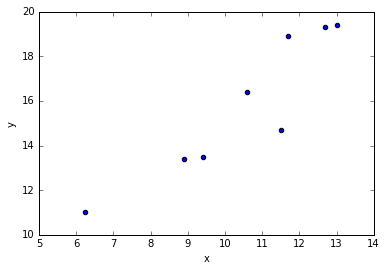

In [17]:
#defining x and y and plotting
x = [9.42,11.7,13.0,12.7,11.5,10.6,6.23,8.91]
y = [13.5,18.9,19.4,19.3,14.7,16.4,11.0,13.4]

plt.scatter(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()


In [18]:
#calc mean, variance and covariance
xmean = np.mean(x)
ymean = np.mean(y)
xvar = np.var(x,ddof=1)
yvar = np.var(y,ddof=1)
covariance = np.cov(x,y,ddof=1)
correlation = np.corrcoef(x,y,ddof=1)

print "mean of x is:     %0.3f" % xmean
print "mean of y is:     %0.3f" % ymean
print "variance of x is: %0.3f" % xvar
print "variance of y is: %0.3f" % yvar
print "covariance is:    %0.3f" % covariance[0][1]
print "correlation is:   %0.3f" % correlation[0][1]

mean of x is:     10.508
mean of y is:     15.825
variance of x is: 5.067
variance of y is: 10.068
covariance is:    6.596
correlation is:   0.924


## Question 8

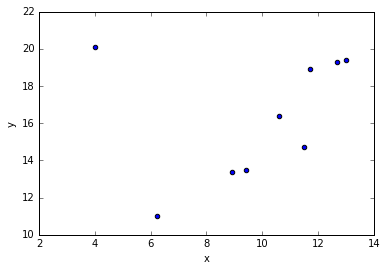

In [19]:
#add the x and y values
x.append(4.0)
y.append(20.1)

plt.scatter(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [20]:


xmean = np.mean(x)
ymean = np.mean(y)
covariance = np.cov(x,y,ddof=1)
correlation = np.corrcoef(x,y,ddof =1)

print "mean of x is:     %0.3f" % xmean
print "mean of y is:     %0.3f" % ymean
print "variance of x is: %0.3f" % covariance[0][0]
print "variance of y is: %0.3f" % covariance[1][1]
print "covariance is:    %0.3f" % covariance[0][1]
print "correlation is:   %0.3f" % correlation[0][1]


mean of x is:     9.784
mean of y is:     16.300
variance of x is: 9.139
variance of y is: 10.840
covariance is:    2.681
correlation is:   0.269


The correlation of the second is pretty weak but when you plot the data points (always plot your data) you will see that the outlier lies enormeously outside of the regular data so the researcher was justified in erasing the outlier.

## Question 9

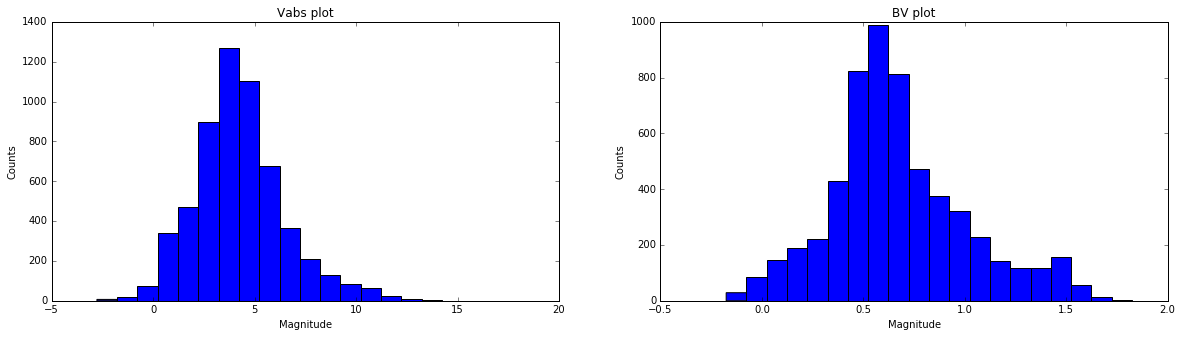

In [11]:
#read in hiparcos
hiparcos = pd.read_csv("hip_clean.csv", index_col=0)

#define bins and fig
binsV = np.arange(min(hiparcos.Vabs),max(hiparcos.Vabs),1)
binsBV = np.arange(min(hiparcos.BV), max(hiparcos.BV),0.1)
fig,ax = plt.subplots(1,2, figsize=(20,5))

#plot the values
ax[0].hist(hiparcos.Vabs,binsV)
ax[1].hist(hiparcos.BV,binsBV)

#set labels and titles
for axe in ax:
    axe.set_ylabel('Counts')
    axe.set_xlabel('Magnitude')
ax[0].set_title("Vabs plot")
ax[1].set_title("BV plot")

plt.show()

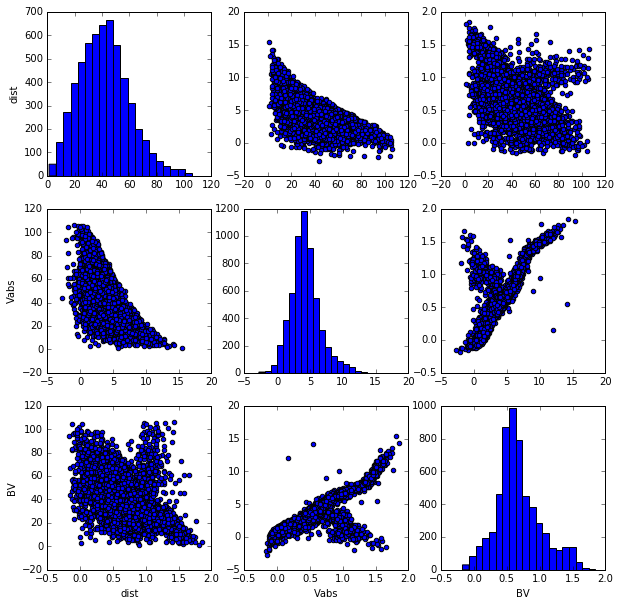

In [12]:
#def figure, lists and iterable variables
fig, axes = plt.subplots(3,3,figsize=(10,10))
listoflists = (hiparcos.dist,hiparcos.Vabs,hiparcos.BV)
namelist = ("dist","Vabs","BV")

x = 0
y = 0
g = 0

    
for i in listoflists: # x dimension
    if y == 2:
        x = 0
    y = 0
    
    for j in listoflists: # y dimension
        #plot hist if x = y else scatter
        if x == y:
            axes[x,y].hist(i, bins=20)
        else:
            axes[x,y].scatter(i,j)
            
        y+=1 
    x +=1

#   set labels in order to make the matrix readable
for ax in axes:
    ax[0].set_ylabel(namelist[g])
    g+=1
invaxes = zip(*axes)
g = 0
for axe in invaxes:
    axe[2].set_xlabel(namelist[g])
    g+=1

plt.show()

## Question 10

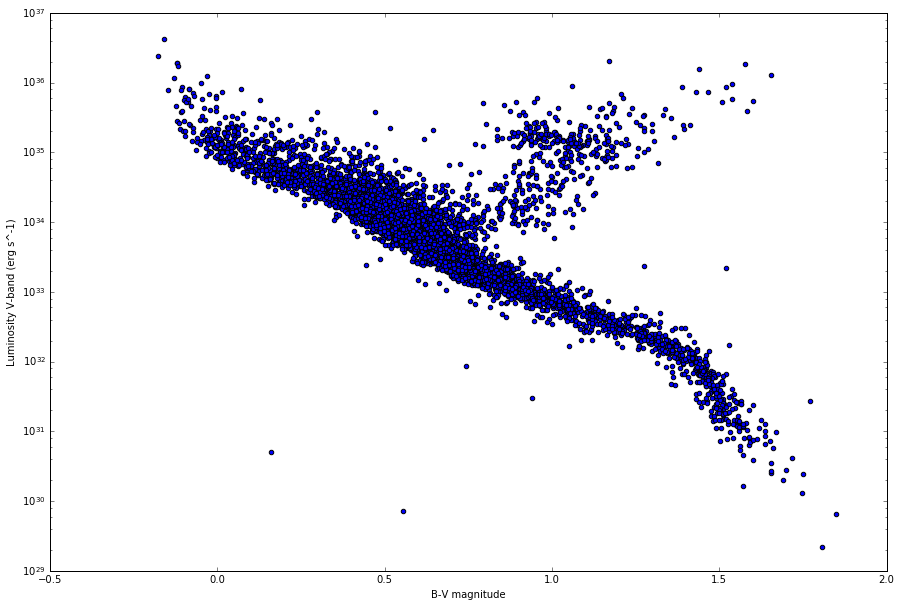

In [13]:
#calculate luminosity
luminosity=[]
for i in hiparcos.Vabs:
    luminosity.append((10**(0.4*(4.83-i)))*3.8270e33)

#plot the graph
fig = plt.figure(figsize=[15,10])
plt.scatter(hiparcos.BV,luminosity)
plt.yscale('log')
plt.ylabel('Luminosity V-band (erg s^-1)')
plt.xlabel('B-V magnitude')
plt.show()


    

## Question 11

we start with the following equation:

\begin{equation}
L \propto F*d^2
\end{equation}

now we know the error in the paralax and we know that:

\begin{equation}
d \propto \frac{1}{p}
\end{equation}

note that the paralax we get from the file is in microarcseconds and we need to up it to arcseconds by dividing by 1000 for the above equation to work.
so we can rewrite the first equation to:

\begin{equation}
L \propto \frac{F}{p^2}
\end{equation}


Now we can find the F:
\begin{equation}
F \propto L*p^2
\end{equation}

and in order to get the error we have:
\begin{equation}
\Delta L = \sqrt{(\frac{\delta L}{\delta p})^2 * \Delta p^2}
\end{equation}

This is because there is no error on the flux. it gives the error in L as $\Delta L$ and the error in p as $\Delta p$ and $\frac{\delta L}{\delta p}$ is:

\begin{equation}
\frac{\delta L}{\delta p} = \frac{-2F}{p^3}
\end{equation}

putting this in the equation leads to:
\begin{equation}
\Delta L = \sqrt{(\frac{-2F}{p^3})^2 * \Delta p^2}
\end{equation}

filling it in, in the notebook below we get:

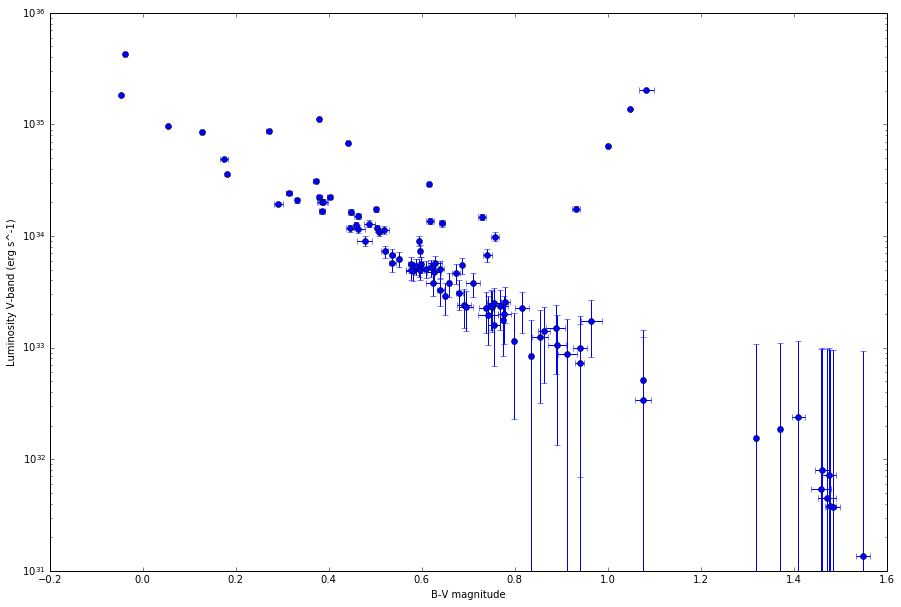

In [14]:
# divide by 1000 to turn paralax in arcseconds
pvalue = hiparcos.Plx/1000
perrorvalue = hiparcos.ePlx/1000

# get the magnitude and error on magnitude
BVerrorvalue = hiparcos.eBV
BVvalue = hiparcos.BV

# divine empty lists for our variables
lerror = []
perror = []
preal = []
BVerror = []
BVreal = []
F = []

# turn pd into list so we can splice
for p in perrorvalue:
    perror.append(p)

for p in pvalue:
    preal.append(p)

for i in BVerrorvalue:
    BVerror.append(i)

for i in BVvalue:
    BVreal.append(i)

    
# calculate Flux using luminosity and the paralax    
for i in range(len(preal)):
    F.append(luminosity[i]*(preal[i]**2))

# calculate luminosity error
for j in range(len(luminosity)):
    lerror.append(np.sqrt((((-2*F[i])/((preal[i])**3))**2)*(perror[i]**2 )))

# splice the lists
BVreal = BVreal[:100]
BVerror = BVerror[:100] 
preal = preal[:100]
perror = perror[:100]
luminosityh = luminosity[:100]
lerror = lerror[:100]

# plot our happy little values

fig = plt.figure(figsize=[15,10])
plt.errorbar(BVreal,luminosityh, yerr=lerror,xerr=BVerror,marker="o", linestyle="")
plt.yscale('log')
plt.ylabel('Luminosity V-band (erg s^-1)')
plt.xlabel('B-V magnitude')
plt.show()


